In [0]:
# https://www.desmos.com/calculator

## **VI.3 3-D PLOT**

In [0]:
import os
import math
import random
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg # used to create png image files

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
# %matplotlib notebook

In [3]:
from google.colab import drive
drive.mount('/content/drive')
wine_data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/winequality-red.csv", sep=';')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# can multiply matrices
# same as np.dot(a.transpose(), b)
# a is implicitly transposed during the calculation
def ft_dot(a, b):
    result = 0
    for i in range(len(a)):
        result += a[i] * b[i]   
    return result

In [0]:
class Perceptron:
    def __init__(self, lr):
        self.W = None
        self.lr = lr
        self.stats = list()

    def predict(self, X):
        return 1 if (ft_dot(self.W, X) >= 0.0) else 0
    
    def _train_epoch(self, X, y, epoch, verbose):
        epoch_errors = 0
        for xi, yi in zip(X, y):
            tmp = self.lr * (yi - self.predict(xi))
            self.W += tmp * xi
            epoch_errors += int(tmp != 0.0)
        if verbose and epoch % 1 == 0:
            print('Epoch {}: {} errors'.format(epoch, epoch_errors))
        self.stats.append((epoch, epoch_errors, self.W))
        return epoch_errors
    
    def train(self, X, y, epochs, verbose=False, seed=None):
        if seed:
            random.seed(seed)
        if self.W is None:
            self.W = [0.0001 * random.uniform(-1, 1) for i in range(X.shape[1])]
        epoch = 0
        while True:
            epoch_errors = self._train_epoch(X, y, epoch, verbose)
            epoch += 1
            if epochs != 0 and epoch == epochs:
                break
            elif epochs == 0 and epoch_errors == 0: # train until no errors
                break        
        return self.stats

In [0]:
good_threshold = 8
bad_threshold = 3
# ONLY SELECT WINES THAT MEET THE THRESHOLDS
selected_wine_data = wine_data[(wine_data['quality'] >= good_threshold) | (wine_data['quality'] <= bad_threshold)]
# ADD A COLUMN Y FOR BINARY CLASSIFICATION
selected_wine_data = selected_wine_data.assign(y = pd.Series(selected_wine_data['quality'] >= good_threshold))

X = selected_wine_data.loc[:, ['volatile acidity', 'pH', 'alcohol']]
X = X.reset_index(drop=True)
X.insert(0, 'x0', 1) # add a column of 1s in the first column
y = selected_wine_data.loc[:, ['y']]
y = y.reset_index(drop=True)

In [8]:
p = Perceptron(lr=1.0)
stats = p.train(X.values, y.values, 0, verbose=True, seed=42)

Epoch 0: 13 errors
Epoch 1: 13 errors
Epoch 2: 5 errors
Epoch 3: 0 errors


In [9]:
stats

[(0, 13, array([ -2.99997211,  -9.635095  , -10.37004499,   4.09994464])),
 (1, 13, array([ -2.99997211,  -9.635095  , -10.37004499,   4.09994464])),
 (2, 5, array([ -2.99997211,  -9.635095  , -10.37004499,   4.09994464])),
 (3, 0, array([ -2.99997211,  -9.635095  , -10.37004499,   4.09994464]))]

In [0]:
def f(intercept, slope1, slope2, a, b):
  return intercept + slope1 * a + slope2 * b

In [0]:
def plot_3d(stats, X, y):
  fig = plt.figure()
  #ax = fig.add_subplot(111, projection='3d')
  ax = fig.gca(projection="3d")

  # draw scatter points
  good_wines = X[y['y'] == True]
  bad_wines = X[y['y'] == False]

  x1 = good_wines.loc[:, features[0]]
  y1 = good_wines.loc[:, features[1]]
  z1 = good_wines.loc[:, features[2]]
  ax.scatter(x1, y1, z1, c='g', marker='o')

  x2 = bad_wines.loc[:, features[0]]
  y2 = bad_wines.loc[:, features[1]]
  z2 = bad_wines.loc[:, features[2]]
  ax.scatter(x2, y2, z2, c='r', marker='o')

  # draw hyperplane
  w0 = stats[-1][2][0]
  w1 = stats[-1][2][2]
  w2 = stats[-1][2][3]
  w3 = stats[-1][2][1]

  intercept = -w0/w3
  slope1 = -w1/w3
  slope2 = -w2/w3

  xmin = X.loc[:, features[0]].min()
  xmax = X.loc[:, features[0]].max()
  ymin = X.loc[:, features[1]].min()
  ymax = X.loc[:, features[1]].max()

  ax.set_xlim(xmin, xmax)
  ax.set_ylim(ymin, ymax)

  units = 10
  #a = np.linspace(0, 2, units)
  #b = np.linspace(2, 4, units)
  a = [xmin + ((xmax - xmin)/units) * i for i in range(units)]
  b = [ymin + ((ymax - ymin)/units) * i for i in range(units)]

  A, B = np.meshgrid(a, b)
  C = f(intercept, slope1, slope2, A, B)
  ax.plot_wireframe(A, B, C, color='black')

  ax.set_xlabel('X Label {}'.format(X.columns[1]))
  ax.set_ylabel('Y Label {}'.format(X.columns[2]))
  ax.set_zlabel('Z Label {}'.format(X.columns[3]))

  # rotation
  print(ax.azim)
  ax.view_init(azim=45)

  plt.show()

-60


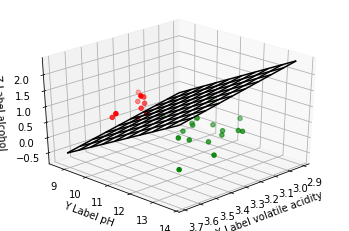

In [12]:
features = ['pH', 'alcohol', 'volatile acidity']
plot_3d(stats, X, y)

How to get and set rotation angle of 3D plot in Matplotlib

https://codeyarns.com/2014/10/27/how-to-get-and-set-rotation-angle-of-3d-plot-in-matplotlib/